In [44]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [45]:
#Define state
class BMIState(TypedDict):
    height: float
    weight: float
    bmi: float
    category: str


In [ ]:
#define your nodes
def calculate_bmi(state: BMIState) -> BMIState:
    # Convert height from cm to meters if it's likely in cm
    height = state["height"]
    if height > 3:
        height = height / 100.0
    bmi = state["weight"] / (height ** 2)
    state["bmi"] = round(bmi, 2)
    return state

def determine_category(state: BMIState) -> BMIState:
    if state["bmi"] < 18.5:
        state["category"] = "Underweight"
    elif state["bmi"] < 24.9:
        state["category"] = "Normal weight"
    else:
        state["category"] = "Overweight"
    return state

# def generate_report(state: BMIState) -> BMIState:
#     report = f"BMI: {state['bmi']:.2f}\nCategory: {state['category']}"
#     return {"report": report}

# def save_report(state: BMIState) -> BMIState:
#     with open("bmi_report.txt", "w") as f:
#         f.write(state["report"])
#     return state


In [47]:
#define your graph
graph = StateGraph(BMIState)

#add nodes to the graph
graph.add_node("calculate_bmi", calculate_bmi)
graph.add_node("determine_category", determine_category)

#add edges to your graph
graph.add_edge(START, "calculate_bmi")
graph.add_edge("calculate_bmi", "determine_category")
graph.add_edge("determine_category", END)

#compile the graph
workflow =graph.compile()





In [48]:
#execute the graph
# Use height in centimeters (e.g., 170 cm) and weight in kilograms (e.g., 70 kg)
initial_state = {"height": 170, "weight": 70}
output = workflow.invoke(initial_state)
print(output)

{'height': 170, 'weight': 70, 'bmi': 24.22, 'category': 'Normal weight'}


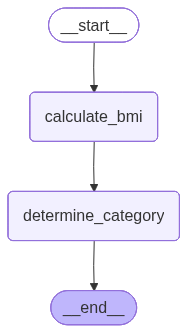

In [49]:
from IPython.display import Image, display
display(Image(data=workflow.get_graph().draw_mermaid_png()))